# Data Exploration

### Import Packages

In [7]:
import pandas as pd
import numpy as np
import re
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
import os

### Bills

In [2]:
bills = pd.read_pickle("data/bills.pkl")

In [3]:
bills.head()

,bill-type,body.amendment,body.division,body.section,body.title,dc:title,file-name,legis-num,legis-type,legis-type.#text,...,metadata.@public-private,metadata.@resolution-stage,metadata.@resolution-type,metadata.@stage-count,metadata.@star-print,official-title,official-title.@display,section,sentence,word
0,bill,NaN,NaN,1. Permanent resident status for Joseph\n\t\t\...,NaN,115 S556 IS: For the relief of Joseph Gabra an...,92510.140382952224512.47152.xml,S. 556,A BILL,NaN,...,private,NaN,NaN,NaN,NaN,For the relief of Joseph Gabra and Sharon Kamel.,NaN,4,11,390
1,resolution,NaN,NaN,That it is the sense of Congress that— (1) the...,NaN,115 HCON 10 IH: Expressing the sense of the Co...,US_Bill_Text_115_HCONRES10_IH.xml,H. CON. RES. 10,CONCURRENT RESOLUTION,NaN,...,public,Introduced-in-House,house-concurrent,NaN,no-star-print,Expressing the sense of the Congress that tax-...,NaN,5,1,126
2,resolution,NaN,NaN,That it is the sense of Congress that— (1) the...,NaN,115 HCON 11 IH: Expressing the sense of Congre...,US_Bill_Text_115_HCONRES11_IH.xml,H. CON. RES. 11,CONCURRENT RESOLUTION,NaN,...,public,Introduced-in-House,house-concurrent,NaN,no-star-print,Expressing the sense of Congress that Jerusale...,NaN,3,1,38
3,resolution,NaN,NaN,That Congress— (1) supports the designation of...,NaN,115 HCON 12 IH: Supporting the designation of ...,US_Bill_Text_115_HCONRES12_IH.xml,H. CON. RES. 12,CONCURRENT RESOLUTION,NaN,...,public,Introduced-in-House,house-concurrent,NaN,no-star-print,Supporting the designation of the week of Sept...,NaN,4,1,80
4,resolution,NaN,NaN,That Congress should not impose any new perfor...,NaN,115 HCON 13 IH: Supporting the Local Radio Fre...,US_Bill_Text_115_HCONRES13_IH.xml,H. CON. RES. 13,CONCURRENT RESOLUTION,NaN,...,public,Introduced-in-House,house-concurrent,NaN,no-star-print,Supporting the Local Radio Freedom Act.,NaN,1,1,43


In [4]:
print("Number of bills: %s"%bills.shape[0])
print("\n===========================================\n")
print("Bill/Legislation Types:\n", bills.groupby(['bill-type','legis-type']).size())
print("\n===========================================\n")
print("Bill Lengths:\n", pd.pivot_table(bills, values=['section', 'sentence', 'word'], 
                                        index=['bill-type'], columns=None, aggfunc=np.mean))

Number of bills: 8039


Bill/Legislation Types:
 bill-type   legis-type           
bill        A BILL                   5935
            AN ACT                    777
resolution  CONCURRENT RESOLUTION     147
            JOINT RESOLUTION          241
            RESOLUTION                921
dtype: int64


Bill Lengths:
                   section    sentence          word
bill-type                                          
amendment-doc  177.933333  491.000000  23650.333333
bill            32.875149   56.827920   1941.044398
resolution       5.864329    9.356707    265.321646


### Summaries

In [5]:
summaries = pd.read_pickle("data/summaries.pkl")

In [8]:
path = 'data/summaries'
print('Number of files we received: {}'.format(len([name for name in os.listdir(path)])))
print('Number of files with a valid file: {}'.format(len(summaries)))
print('Number of files with at least one summary: {}'.format(sum(summaries.summary0.notnull())))
print('Number of files with exactly two summary: {}'.format(sum(summaries.summary1.notnull())))
print('Number of files with exactly three summary: {}'.format(sum(summaries.summary2.notnull())))
print('Number of files with exactly four summary: {}'.format(sum(summaries.summary3.notnull())))

Number of files we received: 8837
Number of files with a valid file: 8759
Number of files with at least one summary: 5395
Number of files with exactly two summary: 670
Number of files with exactly three summary: 160
Number of files with exactly four summary: 54


In [10]:
# ignore NaN in sentence and word fileds
temp = summaries[[_ for _ in filter(lambda x: 'sentence' in x, list(summaries.columns))]]
print('Length of summaries in sentences: {}'.format(np.nanmean(temp)))
temp = summaries[[_ for _ in filter(lambda x: 'word' in x, list(summaries.columns))]]
print('Length of summaries in words: {}'.format(np.nanmean(temp)))     

Length of summaries in sentences: 5.007795100222717
Length of summaries in words: 154.87416481069042


In [18]:
print("\nSample Summary 1\n")
print(summaries[summaries.summary1.notnull()].iloc[0]["summary0"])
print("\nSample Summary 2\n")
print(summaries[summaries.summary2.notnull()].iloc[0]["summary1"])
print("\nSample Summary 3\n")
print(summaries[summaries.summary3.notnull()].iloc[0]["summary2"])


Sample Summary 1

Authorizes expenditures by the Senate Committee on Health, Education, Labor, and Pensions for the 115th Congress.

Sample Summary 2

Highlights:  This concurrent resolution establishes the FY2017 congressional budget resolution, which provides a framework for congressional consideration of revenue, spending, and other budget-related legislation. The budget resolution is a nonbinding framework used by Congress and cannot be signed into law or vetoed by the President.  The resolution establishes budget enforcement procedures by setting forth rules for applying budget points of order to various legislative proposals. It also includes reconciliation instructions directing various congressional committees to submit to the congressional budget committees deficit reduction legislation, which Congress must then consider using expedited legislative procedures.  The resolution includes reserve funds that provide the chairmen of the congressional budget committees with flexibil

### Bills and Summaries

In [11]:
matched = pd.read_pickle('data/matched3.pkl')

In [12]:
matched.head()

,bill-type,billInfo,body.section,file-name,fileName,legis-type,section,sentence,sentence0,sentence1,...,summary1,summary2,summary3,summary4,word,word0,word1,word2,word3,word4
0,bill,S 367,1. Short title Probation Officer Protection Ac...,US_Bill_Text_115_S367_IS.xml,104657.140052642395904.4912.xml,A BILL,6,9,1.0,NaN,...,NaN,NaN,NaN,NaN,194,55.0,NaN,NaN,NaN,NaN
1,bill,S 363,1. Short title North Country National Scenic T...,US_Bill_Text_115_S363_IS.xml,104657.140052642395904.5351.xml,A BILL,3,7,1.0,NaN,...,NaN,NaN,NaN,NaN,96,45.0,NaN,NaN,NaN,NaN
2,resolution,HRES 83,1. Amounts for Committee Expenses For the expe...,US_Bill_Text_115_HRES83_IH.xml,104657.140052642395904.5736.xml,RESOLUTION,3,8,1.0,NaN,...,NaN,NaN,NaN,NaN,185,14.0,NaN,NaN,NaN,NaN
3,resolution,SRES 59,That the Senate— (1) supports the designation ...,US_Bill_Text_115_SRES59_IS.xml,104657.140052642395904.9638.xml,RESOLUTION,3,1,2.0,NaN,...,NaN,NaN,NaN,NaN,34,28.0,NaN,NaN,NaN,NaN
4,bill,S 387,1. Short title Consumer Financial Protection B...,US_Bill_Text_115_S387_IS.xml,104657.140052642395904.9654.xml,A BILL,10,6,2.0,NaN,...,NaN,NaN,NaN,NaN,214,61.0,NaN,NaN,NaN,NaN


In [13]:
print('Number of bills with at least one summary: {}'.format(sum(matched.summary0.notnull())))
print('Number of bills with exactly two summary: {}'.format(sum(matched.summary1.notnull())))
print('Number of bills with exactly three summary: {}'.format(sum(matched.summary2.notnull())))
print('Number of bills with exactly four summary: {}'.format(sum(matched.summary3.notnull())))

Number of bills with at least one summary: 5383
Number of bills with exactly two summary: 670
Number of bills with exactly three summary: 160
Number of bills with exactly four summary: 54


In [24]:
print("Bill/Legislation Types:\n", matched.groupby(['bill-type','legis-type']).size())

Bill/Legislation Types:
 bill-type   legis-type           
bill        A BILL                   3814
            AN ACT                    436
resolution  CONCURRENT RESOLUTION     118
            JOINT RESOLUTION          235
            RESOLUTION                776
dtype: int64


### Summary Length vs. Bill Length

In [14]:
## average of length of summaries to that of bills
temp = matched[[_ for _ in filter(lambda x: re.compile(r'sentence\d').match(x) , list(matched.columns))]]
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    temp = np.nanmean(np.asarray(temp), axis = 1)
    matched['Summary_Sentence_Avg'] = temp
temp = matched[[_ for _ in filter(lambda x: re.compile(r'word\d').match(x) , list(matched.columns))]]
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    temp = np.nanmean(np.asarray(temp), axis = 1)
    matched['Summary_Word_Avg'] = temp
    
## proportion of length of summaries to that of bills
matched['Proportion_Sentence'] = matched['Summary_Sentence_Avg']/matched['sentence']
matched['Proportion_Word'] = matched['Summary_Word_Avg']/matched['word']
matched['Proportion_Section'] = matched['Summary_Sentence_Avg']/matched['section']

matched['Proportion_Sentence0'] = matched['sentence0']/matched['sentence']
matched['Proportion_Word0'] = matched['word0']/matched['word']

In [15]:
matched['Proportion_Section'].head()

0    0.166667
1    0.333333
2    0.333333
3    0.666667
4    0.200000
Name: Proportion_Section, dtype: float64

###### Proportion in Sections

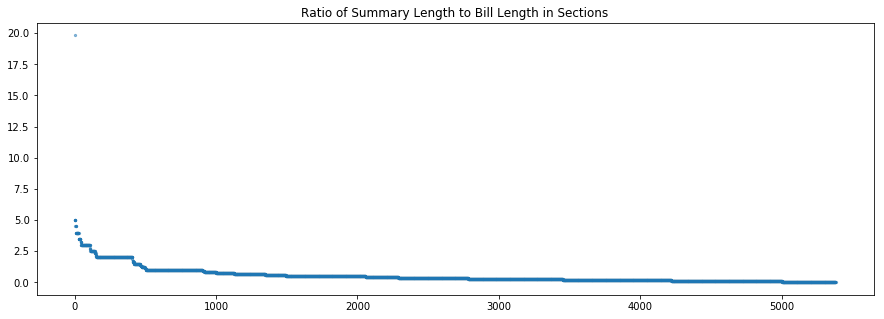

In [16]:
temp = matched[matched['Proportion_Section'] < 100]['Proportion_Section'].sort_values(ascending=False) 
fig = plt.figure(figsize=[15,5])
plt.scatter(np.arange(temp.shape[0]), temp.values, s = 5, alpha = .5 )
plt.title('Ratio of Summary Length to Bill Length in Sections')

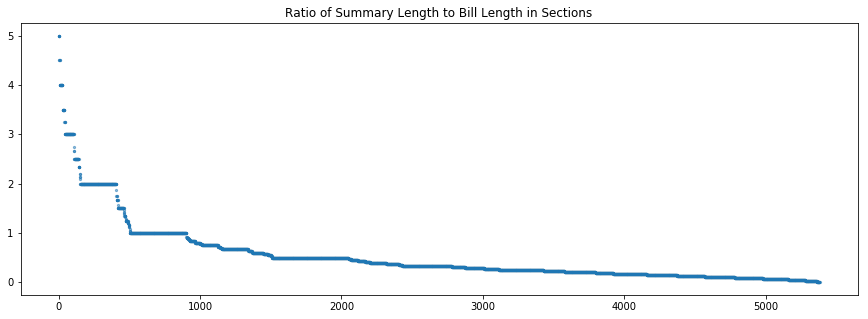

In [17]:
temp = matched[matched['Proportion_Section'] < 100]['Proportion_Section'].sort_values(ascending=False)
temp = temp[temp <  10 ]
fig = plt.figure(figsize=[15,5])
plt.scatter(np.arange(temp.shape[0]), temp.values, s = 5, alpha = .5 )
plt.title('Ratio of Summary Length to Bill Length in Sections')

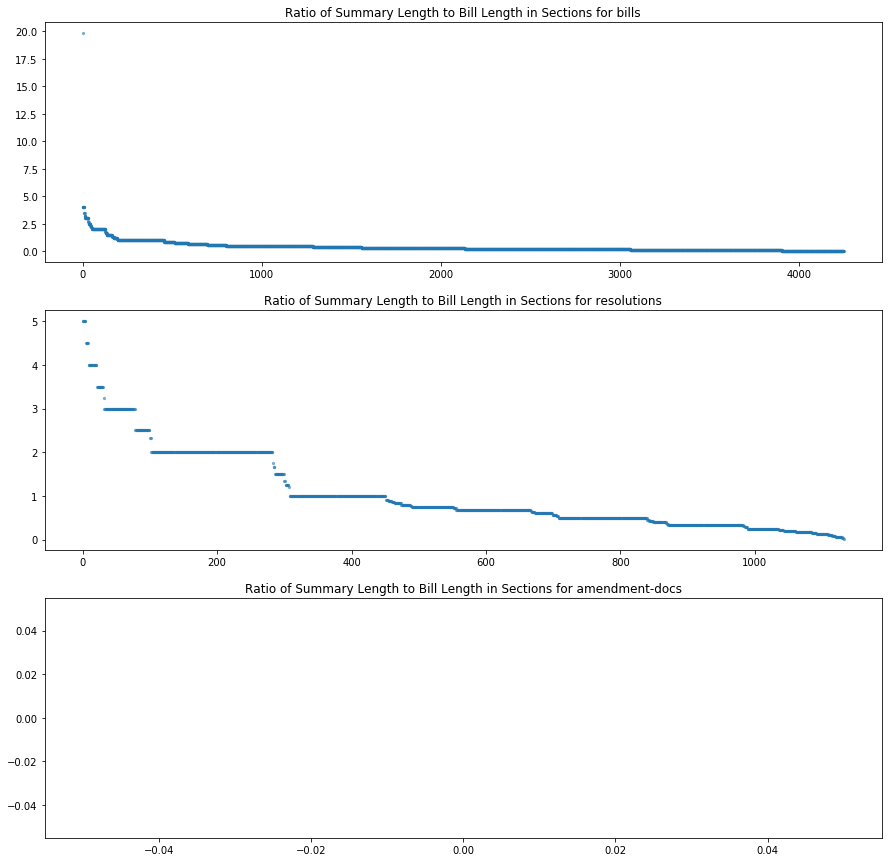

In [18]:
fig, axes = plt.subplots(3, 1, figsize=[15,15])
ax = 0
for t in ['bill', 'resolution', 'amendment-doc']:
    temp = matched[matched['bill-type'] == t]['Proportion_Section'].sort_values(ascending=False)
#     temp = temp[temp <  np.percentile(temp[~np.isnan(temp)], 90) ]
    axes[ax].scatter(np.arange(temp.shape[0]), temp.values, s = 5, alpha = .5 )
    axes[ax].set_title('Ratio of Summary Length to Bill Length in Sections for %ss'%t)
    ax += 1

###### Proportion in Words

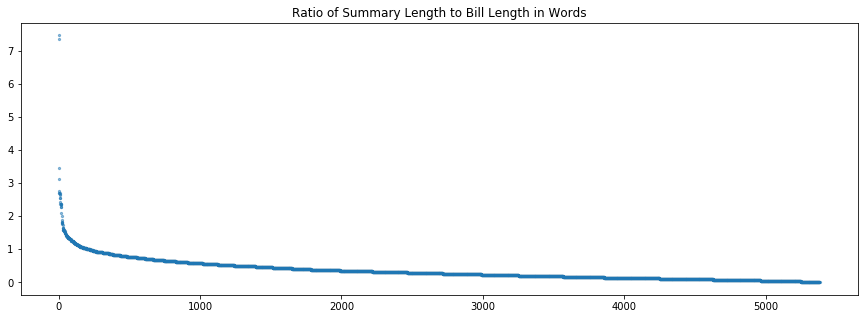

In [19]:
temp = matched[matched['Proportion_Word'] < 100]['Proportion_Word'].sort_values(ascending=False)
# temp = temp[temp <  np.percentile(temp, 90) ]
fig = plt.figure(figsize=[15,5])
plt.scatter(np.arange(temp.shape[0]), temp.values, s = 5, alpha = .5 )
plt.title('Ratio of Summary Length to Bill Length in Words')

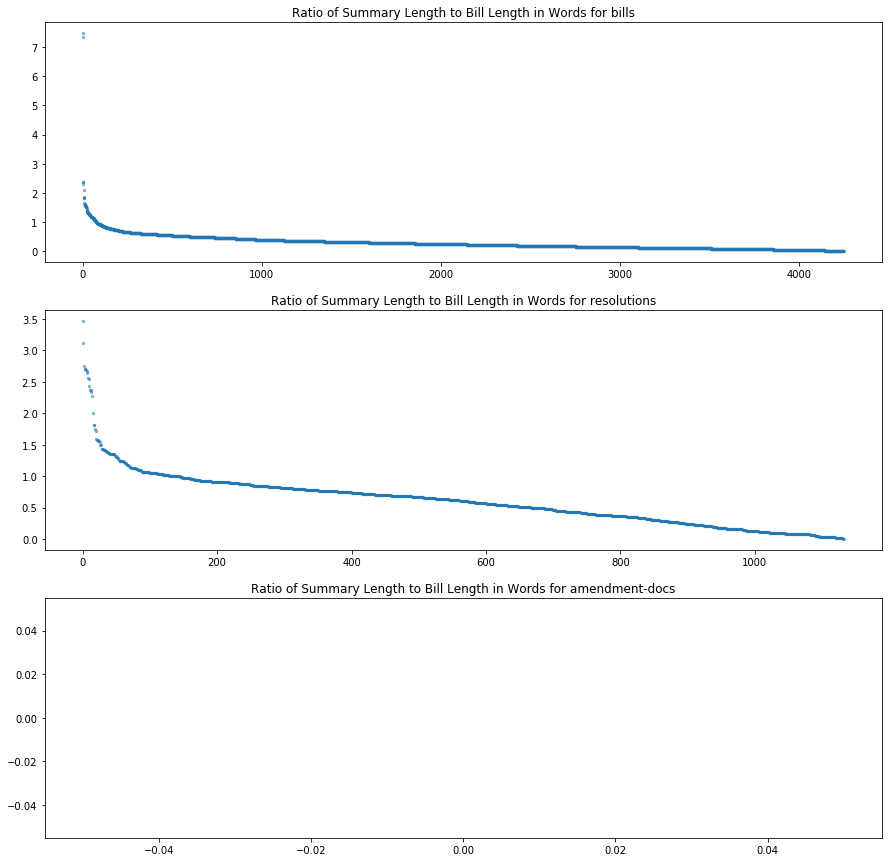

In [20]:
fig, axes = plt.subplots(3, 1, figsize=[15,15])
ax = 0
for t in ['bill', 'resolution', 'amendment-doc']:
    temp = matched[matched['bill-type'] == t]['Proportion_Word'].sort_values(ascending=False)
#     temp = temp[temp <  np.percentile(temp[~np.isnan(temp)], 90) ]
    axes[ax].scatter(np.arange(temp.shape[0]), temp.values, s = 5, alpha = .5 )
    axes[ax].set_title('Ratio of Summary Length to Bill Length in Words for %ss'%t)
    ax += 1

###### Proportion in Sentences

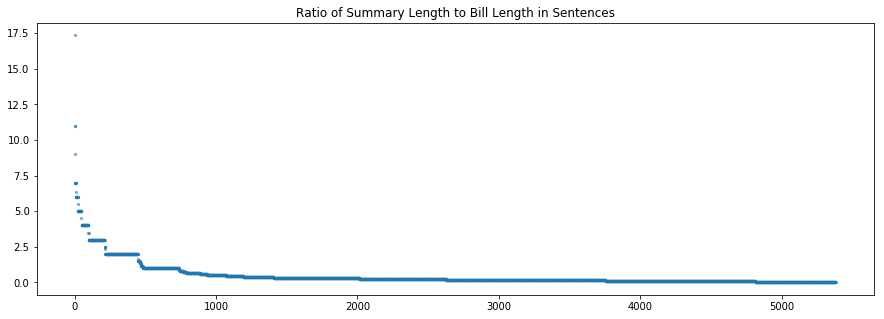

In [21]:
temp = matched[matched['Proportion_Sentence'] < 100]['Proportion_Sentence'].sort_values(ascending=False)
# temp = temp[temp <  np.percentile(temp, 90) ]
fig = plt.figure(figsize=[15,5])
plt.scatter(np.arange(temp.shape[0]), temp.values, s = 5, alpha = .5 )
plt.title('Ratio of Summary Length to Bill Length in Sentences')

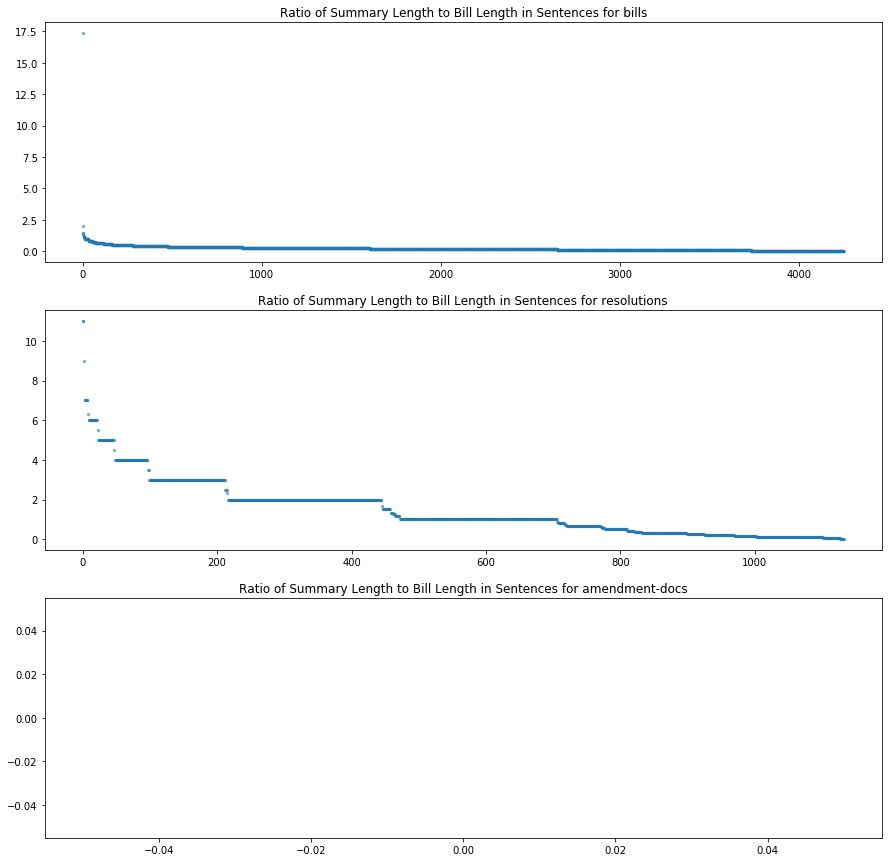

In [22]:
# plots for proportion_sentence categorized by billtyps
fig, axes = plt.subplots(3, 1, figsize=[15,15])
ax = 0
for t in ['bill', 'resolution', 'amendment-doc']:
    temp = matched[matched['bill-type'] == t]['Proportion_Sentence'].sort_values(ascending=False)
#     temp = temp[temp <  np.percentile(temp[~np.isnan(temp)], 90) ]
    axes[ax].scatter(np.arange(temp.shape[0]), temp.values, s = 5, alpha = .5 )
    axes[ax].set_title('Ratio of Summary Length to Bill Length in Sentences for %ss'%t)
    ax += 1

 I find out that there are some dotted lines existent in plots for both Proportion_Sentence and Proportion_Section but not in that for Proportion_Word, which means there are some correlational relationships between bill length in sentences and sections and summary length in sentences.
After categorizing the plots by the bill types, it demonstrates that there are different propertion ratios between bill and summary length for differet bill types.

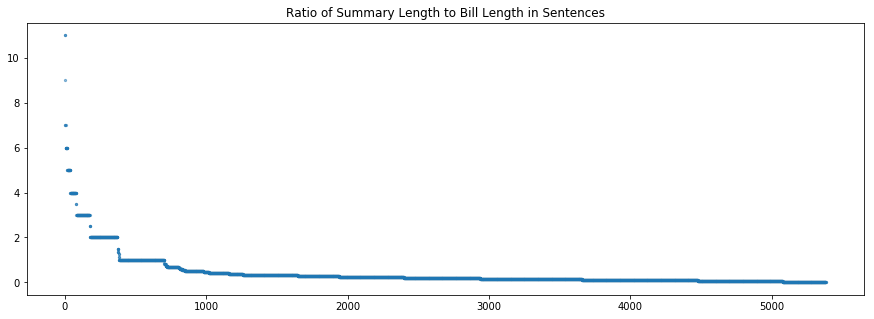

In [23]:
temp = matched[matched['Proportion_Sentence0'] < 100]['Proportion_Sentence0'].sort_values(ascending=False)
# temp = temp[temp <  np.percentile(temp, 90) ]
fig = plt.figure(figsize=[15,5])
plt.scatter(np.arange(temp.shape[0]), temp.values, s = 5, alpha = .5 )
plt.title('Ratio of Summary Length to Bill Length in Sentences')

### Anomaly Detection

In [39]:
## Anamoly Detection - 'Proportion_Sentence' over 100
index = ['file-name','body.section', 'summary0', 'sentence', 'Summary_Sentence_Avg', 'Proportion_Sentence']
temp = matched2[matched2['Proportion_Sentence'] > 100]
print("The filename is :{}".format(temp.iloc[0, np.where(temp.columns == index[0])[0][0]]))
print('\nThe body section of Anamoly:\n')
print(temp.iloc[0, np.where(temp.columns == index[1])[0][0]])
print('\nThe summary0 of Anamoly:\n')
print(temp.iloc[0, np.where(temp.columns == index[2])[0][0]])
print('\nThe number of bill sentences is {}, while the average number of sentences for summary is {}'.format(
temp.iloc[0, np.where(temp.columns == index[3])[0][0]],temp.iloc[0, np.where(temp.columns == index[4])[0][0]]))

The filename is :US_Bill_Text_115_HR244_EAS.xml

The body section of Anamoly:

That the bill from the House of Representatives (H.R. 244) entitled "An Act to encourage effective, voluntary investments to recruit, employ, and retain men and women who have served in the United States military with annual Federal awards to employers recognizing such efforts, and for other purposes.", do pass with the following 

The summary0 of Anamoly:

Honoring Investments in Recruiting and Employing American Military Veterans Act of 2017 or the HIRE Vets Act (Sec. 2) This bill directs the Department of Labor to establish a HIRE Vets Medallion Program to solicit voluntary information from employers for purposes of recognizing, by the award of a HIRE Vets Medallion, verified efforts by these employers to: (1) recruit, employ, and retain veterans; and (2) provide community and charitable services supporting the veteran community. Labor shall annually: (1) solicit voluntary medallion applications from empl

In [969]:
# for the full text of US_Bill_Text_115_HR244_EAS.xml
indir = 'C:/Users/Kunyi Liu/Desktop/H/study/Automatic Summarization of Congressional Bils/bill_text_115'
filename = 'US_Bill_Text_115_HR244_EAS.xml'

data = [] # a list of dict, each element is a xml file

with open(os.path.join(indir, filename), 'rb') as f:
    doc = xmltodict.parse(remove_tags(f.read()))
    data.append(bill_to_dict(filename, doc))
print("Whole body is: {}".format(data[0]['whole_body']))

Whole body is: That the bill from the House of Representatives (H.R. 244) entitled "An Act to encourage effective, voluntary investments to recruit, employ, and retain men and women who have served in the United States military with annual Federal awards to employers recognizing such efforts, and for other purposes.", do pass with the following (1) On page 9, strike lines 11 through 18. (2) Unlawful display prohibited.— On page 9, line 19, strike "(b) ". (3) On page 12, lines 18 through 19, strike ", as defined in such section". 
